

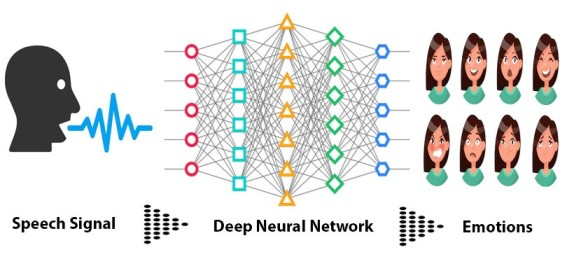

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
from IPython.display import Audio
from scipy import signal
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ravdess_path = "/content/drive/MyDrive/Ravdess/actors/"
noise_path = "/content/drive/MyDrive/Ravdess/noise_test/"

emotions = {
    1: 'neutral', 
    2: 'calm', 
    3: 'happy', 
    4: 'sad', 
    5: 'angry', 
    6: 'fearful', 
    7: 'disgust', 
    8: 'surprised'
}


## Exploratory Data Analysis













Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
*   Vocal channel (01 = speech, 02 = song).
*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
*   Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
*   Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
*   Repetition (01 = 1st repetition, 02 = 2nd repetition).





In [ ]:
columns = ['File', 'Modality', 'Vocal', 'Emotion', 'Intensity', 'Statement', 'Repetition', 'Actor']
df = pd.DataFrame(columns = columns)
actors = ['Actor_'+str(i).zfill(2) for i in range(1, 25)]
files = []
for actor in actors:
    files.extend(os.listdir(ravdess_path+actor))
df['File'] = files
file = files[0]
for i in range(len(files)):
    file = files[i]
    integer_list = list(map(int, file.split('.')[0].split('-')))
    df.loc[i, df.columns[1:]] = integer_list

df.head()

,File,Modality,Vocal,Emotion,Intensity,Statement,Repetition,Actor
0,03-01-01-01-01-01-01.wav,3,1,1,1,1,1,1
1,03-01-01-01-02-02-01.wav,3,1,1,1,2,2,1
2,03-01-02-01-02-01-01.wav,3,1,2,1,2,1,1
3,03-01-01-01-02-01-01.wav,3,1,1,1,2,1,1
4,03-01-01-01-01-02-01.wav,3,1,1,1,1,2,1


In [ ]:
file.split('.')[0].split('-')

['03', '01', '08', '01', '02', '02', '24']

In [ ]:
df.loc[i, df.columns[1:]] 

Modality       3
Vocal          1
Emotion        8
Intensity      1
Statement      2
Repetition     2
Actor         24
Name: 1439, dtype: object

In [ ]:
def read_wav_file(Ravdess, file):
    """ Read wav audio file and return numpy array and samplerate"""
    
    signal, samplerate = librosa.load(os.path.join(Ravdess+file), res_type='kaiser_fast')
    return signal, samplerate

def plot_waveplot(data, sr, emotion):
    """Plot the wave plot by numpy array and samplerate """
    
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(data, sr=sr)
    plt.grid()
    plt.title('Waveplot with {} emotion'.format(emotion), size=15)
    plt.show()
    
def plot_mel_spectrogram(data, sr,emotion):
    """Plot mel spectrogram with mel scaling"""
    
    spectrogram = librosa.feature.melspectrogram(data, sr=sr) #converted to mel scale
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(12, 3))
    plt.title('Mel Spectrogram with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()

def plot_spectrogram(data, sr, emotion):
    X = librosa.stft(data) #short term fourier transform 
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

## Audio Data Visualization for Actor_01's audio sample

In [ ]:
sample_path_0 = 'Actor_'+str(df.loc[0, 'Actor']).zfill(2)+'/'+df['File'][0]
sample_emotion_0 = emotions.get(df.loc[0, 'Emotion'])

In [ ]:
sample_path_1 = 'Actor_'+str(df.loc[5, 'Actor']).zfill(2)+'/'+df['File'][5]
sample_emotion_1 = emotions.get(df.loc[5, 'Emotion'])

## Neutral

In [ ]:
Audio(ravdess_path+sample_path_0)

In [ ]:
signal_1,sample_rate = read_wav_file(ravdess_path,sample_path_0)
print('Length Signal Numpy Array:', len(signal_1))
print('Samplerate:', sample_rate)
print(f'Length of Audio:{len(signal_1)/sample_rate} sec')

Length Signal Numpy Array: 72838
Samplerate: 22050
Length of Audio:3.3033106575963718 sec


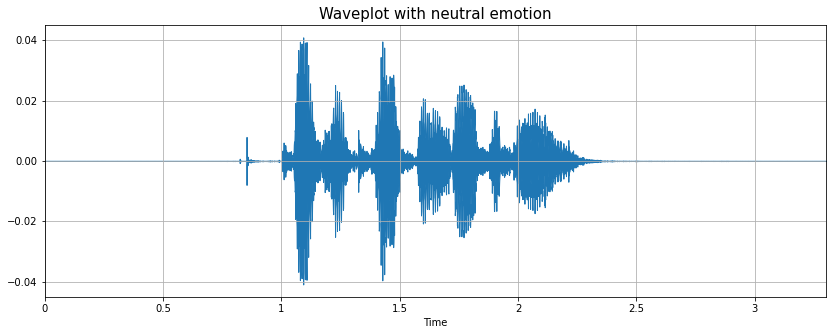

In [ ]:
plot_waveplot(signal_1,sample_rate,sample_emotion_0)

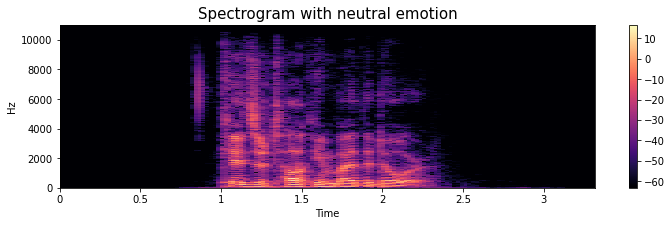

In [ ]:
plot_spectrogram(signal_1,sample_rate,sample_emotion_0)

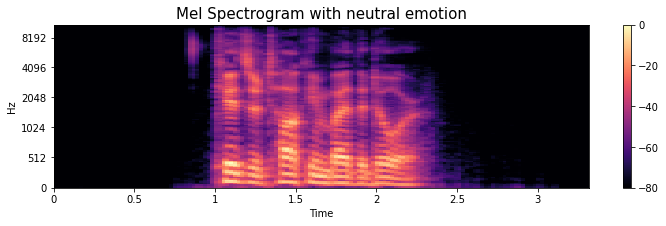

In [ ]:
plot_mel_spectrogram(signal_1,sample_rate,sample_emotion_0)

## Calm

In [ ]:
Audio(ravdess_path+sample_path_1)

In [ ]:
data,sample_rate = read_wav_file(ravdess_path,sample_path_0)

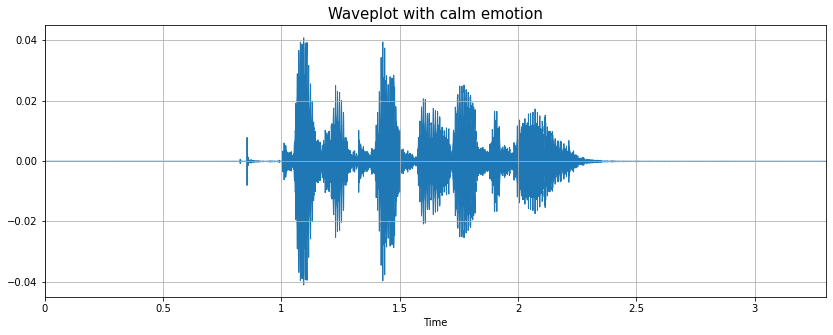

In [ ]:
plot_waveplot(data,sample_rate,sample_emotion_1)

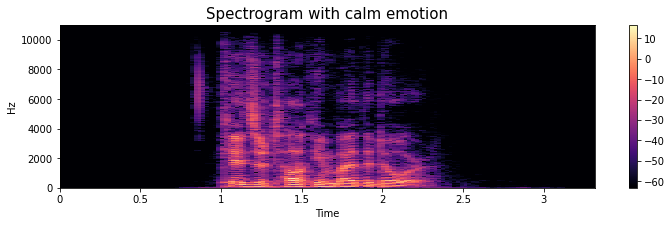

In [ ]:
plot_spectrogram(data,sample_rate,sample_emotion_1)

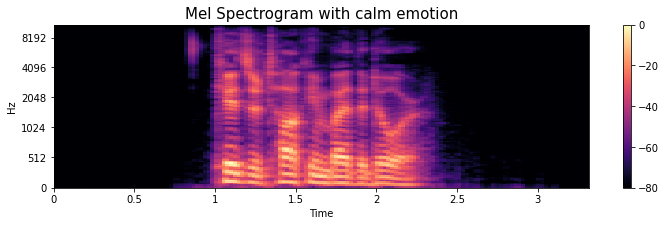

In [ ]:
plot_mel_spectrogram(data,sample_rate,sample_emotion_1)

## Noise Removal

- Spectral Gating
- PCEN
- Filtering low-frequencies

Filtering Low Frequencies

In [ ]:
def filter_low_freq(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:
noise_sample_0 = noise_path+'high_noise_test.mp3'
noise_sample_1 = noise_path+'low_noise_test.mp3'
data_1,sr = librosa.load(noise_sample_0, mono=True,offset=0, duration=10)
data_2,sr = librosa.load(noise_sample_1, mono=True,offset=0, duration=10)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
Audio(noise_sample_1)

In [ ]:
yf1 = filter_low_freq(data_1, sr)
yf2 = filter_low_freq(data_2, sr)

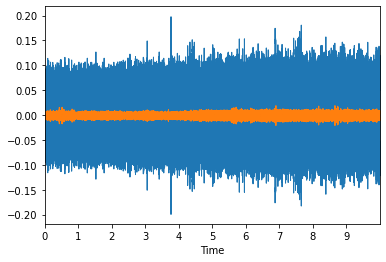

In [ ]:
librosa.display.waveplot(data_1,sr=sr, x_axis='time')
librosa.display.waveplot(yf1,sr=sr, x_axis='time')


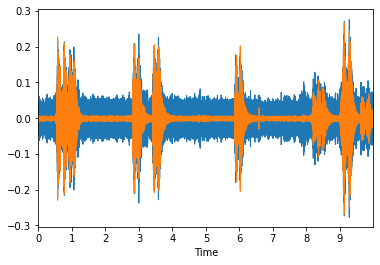

In [ ]:
librosa.display.waveplot(data_2,sr=sr, x_axis='time');
librosa.display.waveplot(yf2,sr=sr, x_axis='time');

In [ ]:
Audio(yf2,rate=sr)